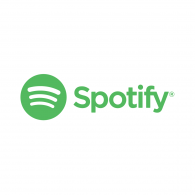
### Spotify Project
### by: Shivalika And Alexis

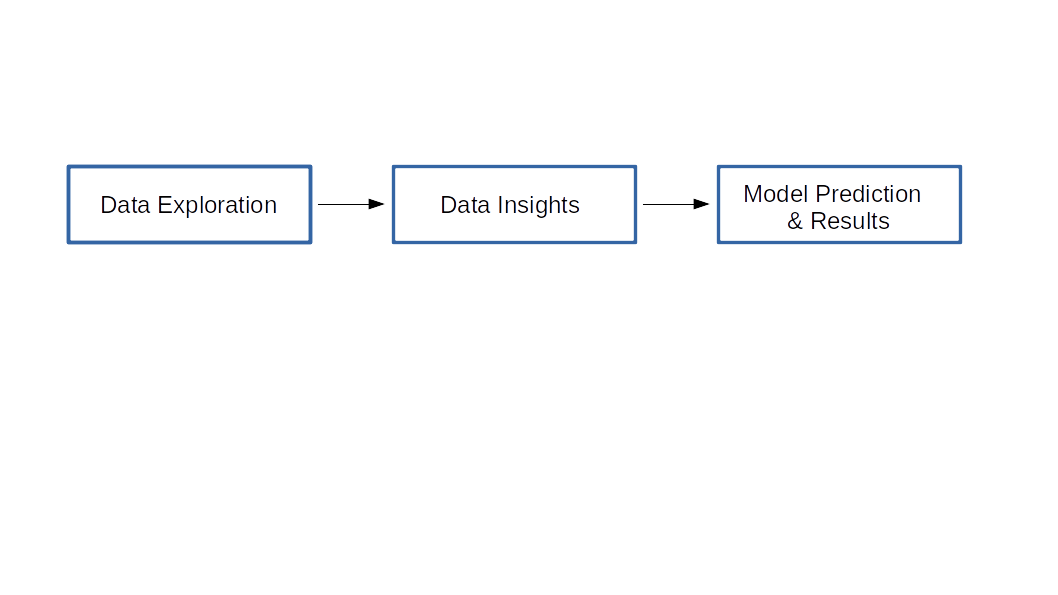

### Libraries imported

In [1]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('data.csv')
df.head(10)

Position                  Track Name           Artist  Streams  \
0         1  Reggaetón Lento (Bailemos)             CNCO    19272   
1         2                    Chantaje          Shakira    19270   
2         3   Otra Vez (feat. J Balvin)    Zion & Lennox    15761   
3         4                Vente Pa' Ca     Ricky Martin    14954   
4         5                      Safari         J Balvin    14269   
5         6                La Bicicleta     Carlos Vives    12843   
6         7                  Ay Mi Dios         IAmChino    10986   
7         8          Andas En Mi Cabeza    Chino & Nacho    10653   
8         9                 Traicionera  Sebastian Yatra     9807   
9        10                 Shaky Shaky     Daddy Yankee     9612   

                                                 URL        Date Region  
0  https://open.spotify.com/track/3AEZUABDXNtecAO...  2017-01-01     ec  
1  https://open.spotify.com/track/6mICuAdrwEjh6Y6...  2017-01-01     ec  
2  https://open.spotify.com/track/3QwBODjSEzelZyV...  2017-01-01     ec  
3  https://open.spotify.com/track/7DM4BPaS7uofFul...  2017-01-01     ec  
4  https://open.spotify.com/track/6rQSrBHf7HlZjtc...  2017-01-01     ec  
5  https://open.spotify.com/track/0sXvAOmXgjR2QUq...  2017-01-01     ec  
6  https://open.spotify.com/track/6stYbAJgTszHAHZ...  2017-01-01     ec  
7  https://open.spotify.com/track/5mey7CLLuFToM2P...  2017-01-01     ec  
8  https://open.spotify.com/track/5J1c3M4EldCfNxX...  2017-01-01     ec  
9  https://open.spotify.com/track/58IL315gMSTD37D...  2017-01-01     ec

### Web Scrapping to obtain list of countries

In [4]:
url = "https://spotifycharts.com/regional/global/daily/latest"
res = requests.get(url)
soup = BeautifulSoup(res.content)
soup

<!DOCTYPE html>
<html>
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<title>Spotify Charts</title>
<meta content="Spotify Charts" property="og:title"/>
<meta content="website" property="og:type"/>
<meta content="https://www.spotifycharts.com/" property="og:url"/>
<meta content="http://d2c87l0yth4zbw-2.global.ssl.fastly.net/i/_global/open-graph-default.png" property="og:image"/>
<meta content="Spotify is all the music you’ll ever need." property="og:description"/>
<meta content="Spotify is all the music you’ll ever need." name="description"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="/images/touch-icon-144.png" rel="apple-touch-icon-precomposed" sizes="144x144"/>
<link href="/images/touch-icon-114.png" rel="apple-touch-icon-precomposed" sizes="114x114"/>
<link href="/images/touch-icon-72.png" rel="apple-touch-icon-precomposed" sizes="72x72"/>
<link href="/images/touch-icon-57.png" rel="apple-touch

In [5]:
categories = soup.find_all( 'li',text=True)
region = df['Region'].values

initial, country = [], []
for c in categories:
    if c.has_attr("data-value"):
        initial.append(c['data-value'])
        country.append(c.text)
            
print(initial[:66])
print(country[:66])

['global', 'us', 'gb', 'ad', 'ar', 'at', 'au', 'be', 'bg', 'bo', 'br', 'ca', 'ch', 'cl', 'co', 'cr', 'cy', 'cz', 'de', 'dk', 'do', 'ec', 'ee', 'es', 'fi', 'fr', 'gr', 'gt', 'hk', 'hn', 'hu', 'id', 'ie', 'il', 'in', 'is', 'it', 'jp', 'lt', 'lu', 'lv', 'mc', 'mt', 'mx', 'my', 'ni', 'nl', 'no', 'nz', 'pa', 'pe', 'ph', 'pl', 'pt', 'py', 'ro', 'se', 'sg', 'sk', 'sv', 'th', 'tr', 'tw', 'uy', 'vn', 'za']
['Global', 'United States', 'United Kingdom', 'Andorra', 'Argentina', 'Austria', 'Australia', 'Belgium', 'Bulgaria', 'Bolivia', 'Brazil', 'Canada', 'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Cyprus', 'Czech Republic', 'Germany', 'Denmark', 'Dominican Republic', 'Ecuador', 'Estonia', 'Spain', 'Finland', 'France', 'Greece', 'Guatemala', 'Hong Kong', 'Honduras', 'Hungary', 'Indonesia', 'Ireland', 'Israel', 'India', 'Iceland', 'Italy', 'Japan', 'Lithuania', 'Luxembourg', 'Latvia', 'Monaco', 'Malta', 'Mexico', 'Malaysia', 'Nicaragua', 'Netherlands', 'Norway', 'New Zealand', 'Panama', 'Peru

In [6]:
df.head(3)

Position                  Track Name         Artist  Streams  \
0         1  Reggaetón Lento (Bailemos)           CNCO    19272   
1         2                    Chantaje        Shakira    19270   
2         3   Otra Vez (feat. J Balvin)  Zion & Lennox    15761   

                                                 URL        Date Region  
0  https://open.spotify.com/track/3AEZUABDXNtecAO...  2017-01-01     ec  
1  https://open.spotify.com/track/6mICuAdrwEjh6Y6...  2017-01-01     ec  
2  https://open.spotify.com/track/3QwBODjSEzelZyV...  2017-01-01     ec

In [7]:
d=dict(zip(initial[:66],country[:66]))
df['Region']=df['Region'].map(d)
df.head(3)

Position                  Track Name         Artist  Streams  \
0         1  Reggaetón Lento (Bailemos)           CNCO    19272   
1         2                    Chantaje        Shakira    19270   
2         3   Otra Vez (feat. J Balvin)  Zion & Lennox    15761   

                                                 URL        Date   Region  
0  https://open.spotify.com/track/3AEZUABDXNtecAO...  2017-01-01  Ecuador  
1  https://open.spotify.com/track/6mICuAdrwEjh6Y6...  2017-01-01  Ecuador  
2  https://open.spotify.com/track/3QwBODjSEzelZyV...  2017-01-01  Ecuador

### Top 5 songs (daily basis)

In [8]:
df_top5=df[df.Position<=5]
df_top5.head(15)

Position                  Track Name         Artist  Streams  \
0           1  Reggaetón Lento (Bailemos)           CNCO    19272   
1           2                    Chantaje        Shakira    19270   
2           3   Otra Vez (feat. J Balvin)  Zion & Lennox    15761   
3           4                Vente Pa' Ca   Ricky Martin    14954   
4           5                      Safari       J Balvin    14269   
200         1  Reggaetón Lento (Bailemos)           CNCO    16672   
201         2                    Chantaje        Shakira    15594   
202         3   Otra Vez (feat. J Balvin)  Zion & Lennox    13507   
203         4                      Safari       J Balvin    11958   
204         5                Vente Pa' Ca   Ricky Martin    11590   
400         1  Reggaetón Lento (Bailemos)           CNCO    17258   
401         2                    Chantaje        Shakira    16614   
402         3   Otra Vez (feat. J Balvin)  Zion & Lennox    14148   
403         4                      Safari       J Balvin    12336   
404         5                Vente Pa' Ca   Ricky Martin    12280   

                                                   URL        Date   Region  
0    https://open.spotify.com/track/3AEZUABDXNtecAO...  2017-01-01  Ecuador  
1    https://open.spotify.com/track/6mICuAdrwEjh6Y6...  2017-01-01  Ecuador  
2    https://open.spotify.com/track/3QwBODjSEzelZyV...  2017-01-01  Ecuador  
3    https://open.spotify.com/track/7DM4BPaS7uofFul...  2017-01-01  Ecuador  
4    https://open.spotify.com/track/6rQSrBHf7HlZjtc...  2017-01-01  Ecuador  
200  https://open.spotify.com/track/3AEZUABDXNtecAO...  2017-01-02  Ecuador  
201  https://open.spotify.com/track/6mICuAdrwEjh6Y6...  2017-01-02  Ecuador  
202  https://open.spotify.com/track/3QwBODjSEzelZyV...  2017-01-02  Ecuador  
203  https://open.spotify.com/track/6rQSrBHf7HlZjtc...  2017-01-02  Ecuador  
204  https://open.spotify.com/track/7DM4BPaS7uofFul...  2017-01-02  Ecuador  
400  https://open.spotify.com/track/3AEZUABDXNtecAO...  2017-01-03  Ecuador  
401  https://open.spotify.com/track/6mICuAdrwEjh6Y6...  2017-01-03  Ecuador  
402  https://open.spotify.com/track/3QwBODjSEzelZyV...  2017-01-03  Ecuador  
403  https://open.spotify.com/track/6rQSrBHf7HlZjtc...  2017-01-03  Ecuador  
404  https://open.spotify.com/track/7DM4BPaS7uofFul...  2017-01-03  Ecuador

### extracting month and Day from Date column

In [9]:
df_top5["Date"] = df_top5["Date"].apply( lambda x: pd.to_datetime(x, format = '%Y-%m-%d') )
df_top5["Year"] = df_top5["Date"].dt.year
df_top5['month']= df_top5['Date'].dt.month
df_top5['Day']  = df_top5['Date'].dt.day
df_top5

Position                       Track Name          Artist  Streams  \
0               1       Reggaetón Lento (Bailemos)            CNCO    19272   
1               2                         Chantaje         Shakira    19270   
2               3        Otra Vez (feat. J Balvin)   Zion & Lennox    15761   
3               4                     Vente Pa' Ca    Ricky Martin    14954   
4               5                           Safari        J Balvin    14269   
...           ...                              ...             ...      ...   
3440997         1                Rewrite The Stars       Zac Efron    13012   
3440998         2                           Wolves    Selena Gomez    12636   
3440999         3                           Havana  Camila Cabello    12608   
3441000         4  Finesse (Remix) [feat. Cardi B]      Bruno Mars    11309   
3441001         5         River (feat. Ed Sheeran)          Eminem    11208   

                                                       URL       Date  \
0        https://open.spotify.com/track/3AEZUABDXNtecAO... 2017-01-01   
1        https://open.spotify.com/track/6mICuAdrwEjh6Y6... 2017-01-01   
2        https://open.spotify.com/track/3QwBODjSEzelZyV... 2017-01-01   
3        https://open.spotify.com/track/7DM4BPaS7uofFul... 2017-01-01   
4        https://open.spotify.com/track/6rQSrBHf7HlZjtc... 2017-01-01   
...                                                    ...        ...   
3440997  https://open.spotify.com/track/630sXRhIcfwr2e4... 2018-01-09   
3440998  https://open.spotify.com/track/7EmGUiUaOSGDnUU... 2018-01-09   
3440999  https://open.spotify.com/track/0ofbQMrRDsUaVKq... 2018-01-09   
3441000  https://open.spotify.com/track/3Vo4wInECJQuz9B... 2018-01-09   
3441001  https://open.spotify.com/track/5UEnHoDYpsxlfzW... 2018-01-09   

            Region  Year  month  Day  
0          Ecuador  2017      1    1  
1          Ecuador  2017      1    1  
2          Ecuador  2017      1    1  
3          Ecuador  2017      1    1  
4          Ecuador  2017      1    1  
...            ...   ...    ...  ...  
3440997  Hong Kong  2018      1    9  
3440998  Hong Kong  2018      1    9  
3440999  Hong Kong  2018      1    9  
3441000  Hong Kong  2018      1    9  
3441001  Hong Kong  2018      1    9  

[98369 rows x 10 columns]

### selecting data from 2017

In [10]:
df_top5_2017=df_top5[df_top5["Year"]==2017]

In [11]:
df_top5_2017.head()

Position                  Track Name         Artist  Streams  \
0         1  Reggaetón Lento (Bailemos)           CNCO    19272   
1         2                    Chantaje        Shakira    19270   
2         3   Otra Vez (feat. J Balvin)  Zion & Lennox    15761   
3         4                Vente Pa' Ca   Ricky Martin    14954   
4         5                      Safari       J Balvin    14269   

                                                 URL       Date   Region  \
0  https://open.spotify.com/track/3AEZUABDXNtecAO... 2017-01-01  Ecuador   
1  https://open.spotify.com/track/6mICuAdrwEjh6Y6... 2017-01-01  Ecuador   
2  https://open.spotify.com/track/3QwBODjSEzelZyV... 2017-01-01  Ecuador   
3  https://open.spotify.com/track/7DM4BPaS7uofFul... 2017-01-01  Ecuador   
4  https://open.spotify.com/track/6rQSrBHf7HlZjtc... 2017-01-01  Ecuador   

   Year  month  Day  
0  2017      1    1  
1  2017      1    1  
2  2017      1    1  
3  2017      1    1  
4  2017      1    1

### NAN value check

In [12]:
df_top5_2017[df_top5_2017.isnull().any(axis=1)].head()

Position Track Name Artist  Streams  \
61804          5        NaN    NaN    16767   
62004          5        NaN    NaN    19114   
210201         2        NaN    NaN   187598   
210401         2        NaN    NaN   217047   
210601         2        NaN    NaN   245131   

                                                      URL       Date  \
61804   https://open.spotify.com/track/1YqcGlCHNquxBhl... 2017-11-09   
62004   https://open.spotify.com/track/1YqcGlCHNquxBhl... 2017-11-10   
210201  https://open.spotify.com/track/1YqcGlCHNquxBhl... 2017-11-09   
210401  https://open.spotify.com/track/1YqcGlCHNquxBhl... 2017-11-10   
210601  https://open.spotify.com/track/1YqcGlCHNquxBhl... 2017-11-11   

           Region  Year  month  Day  
61804     Ecuador  2017     11    9  
62004     Ecuador  2017     11   10  
210201  Argentina  2017     11    9  
210401  Argentina  2017     11   10  
210601  Argentina  2017     11   11

### Extracting unique URLs for NAN values

In [13]:
df_top5_2017[df_top5_2017.isnull().any(axis=1)]["URL"].unique()

array(['https://open.spotify.com/track/1YqcGlCHNquxBhlUZsjhMT',
       'https://open.spotify.com/track/3RXkboS74UYzN14xTqzPyY',
       'https://open.spotify.com/track/4JAyIDXOqNM6qHuZML01uX'],
      dtype=object)

### obtaining Track IDs from a different dataFrame

In [14]:
url_df=[i.strip('https://open.spotify.com/track') for i in df_top5_2017.URL if isinstance(i,str)]
df_top5_2017['Id']=url_df

### Replacing NAN Track Names and Artists

In [15]:
def replace_values(df, Id, new_track, new_artist):
    df.loc[df["Id"] == Id, "Track Name"] = new_track
    df.loc[df["Id"] == Id, "Artist"] = new_artist
    return df

df_top5_2017 = replace_values( df_top5_2017, '1YqcGlCHNquxBhlUZsjhMT', 'Track Name Unknown1', 'Artist Unknown1')
df_top5_2017 = replace_values( df_top5_2017, '3RXkboS74UYzN14xTqzPyY', 'Track Name Unknown1', 'Artist Unknown1')
df_top5_2017 = replace_values( df_top5_2017, '4JAyIDXOqNM6qHuZML01uX', 'Track Name Unknown1', 'Artist Unknown1')

In [16]:
df_top5_2017["Track Name & Artist"] = df_top5_2017['Track Name'] + " , " + df_top5_2017['Artist']

### Obtaining collective Streams for top stongs depending on the region

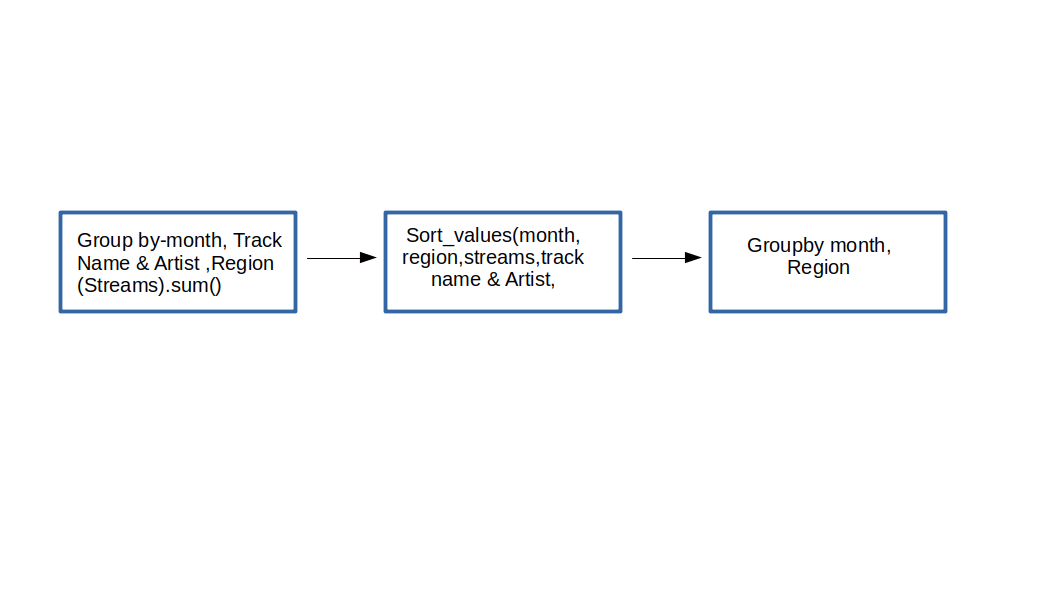

In [49]:
df_top5_2017_groupbyMonth = df_top5_2017.groupby(["Id", "month", "Track Name & Artist", "Region"])["Streams"].agg("sum").reset_index().sort_values(["month", "Region", "Streams", "Track Name & Artist"], ascending=[True,True,False,True]).groupby(["month", "Region"]).head(5)
df_top5_2017_groupbyMonth.head(30)

Id  month  \
2291    3AEZUABDXNtecAOSC1qT      1   
5127  6mICuAdrwEjh6Y6lroV2Kg      1   
906   1MpKZi1zTXpERKwxmOu1PH      1   
5614  7DM4BPaS7uofFul3ywMe46      1   
3232  4aWmUDTfIPGksMNLV2rQP2      1   
6109  7qiZfU4dY1lWllzX7mPBI3      1   
4695  6PCUP3dWmTjcTtXY02oFdT      1   
2506  3NdDpSvN911VPGivFlV5d0      1   
4254  5knuzwU65gJK7IF5yJsuaW      1   
4085  5aAx2yezTd8zXrkmtKl66Z      1   
6110  7qiZfU4dY1lWllzX7mPBI3      1   
128    0JiVRyTJcJnmlwCZ854K4      1   
4696  6PCUP3dWmTjcTtXY02oFdT      1   
2507  3NdDpSvN911VPGivFlV5d0      1   
4255  5knuzwU65gJK7IF5yJsuaW      1   
6111  7qiZfU4dY1lWllzX7mPBI3      1   
4256  5knuzwU65gJK7IF5yJsuaW      1   
4697  6PCUP3dWmTjcTtXY02oFdT      1   
5410  72jbDTw1piOOj770jWNeaG      1   
4086  5aAx2yezTd8zXrkmtKl66Z      1   
2292    3AEZUABDXNtecAOSC1qT      1   
3233  4aWmUDTfIPGksMNLV2rQP2      1   
2665  3QwBODjSEzelZyVjxPOHdq      1   
5128  6mICuAdrwEjh6Y6lroV2Kg      1   
4502  6De0lHrwBfPfrhorm9q1Xl      1   
105   0EPxmvsG1BY5td4aTOkWBF      1   
1091  1a5Yu5L18qNxVhXx38njON      1   
6113  7qiZfU4dY1lWllzX7mPBI3      1   
1560  257tme6AhneIKAqVF1HTH4      1   
5121   6m2LNopVJKsvBB9l7Z1rw      1   

                                    Track Name & Artist     Region   Streams  
2291                  Reggaetón Lento (Bailemos) , CNCO  Argentina   5800121  
5127                                 Chantaje , Shakira  Argentina   5598197  
906                    Cuando Se Pone a Bailar , Rombai  Argentina   4233877  
5614                        Vente Pa' Ca , Ricky Martin  Argentina   3820810  
3232    Despacito (Featuring Daddy Yankee) , Luis Fonsi  Argentina   2948078  
6109                          Shape of You , Ed Sheeran  Australia   6238959  
4695                    Castle on the Hill , Ed Sheeran  Australia   4606955  
2506  I Don’t Wanna Live Forever (Fifty Shades Darke...  Australia   4135079  
4254  Rockabye (feat. Sean Paul & Anne-Marie) , Clea...  Australia   2692032  
4085                               Starboy , The Weeknd  Australia   2645291  
6110                          Shape of You , Ed Sheeran    Austria    724173  
128                                 Alone , Alan Walker    Austria    486796  
4696                    Castle on the Hill , Ed Sheeran    Austria    463024  
2507  I Don’t Wanna Live Forever (Fifty Shades Darke...    Austria    363893  
4255  Rockabye (feat. Sean Paul & Anne-Marie) , Clea...    Austria    342144  
6111                          Shape of You , Ed Sheeran    Belgium   1221960  
4256  Rockabye (feat. Sean Paul & Anne-Marie) , Clea...    Belgium    718559  
4697                    Castle on the Hill , Ed Sheeran    Belgium    685293  
5410                           Paris , The Chainsmokers    Belgium    424891  
4086                               Starboy , The Weeknd    Belgium    282282  
2292                  Reggaetón Lento (Bailemos) , CNCO    Bolivia    217326  
3233    Despacito (Featuring Daddy Yankee) , Luis Fonsi    Bolivia    188054  
2665          Otra Vez (feat. J Balvin) , Zion & Lennox    Bolivia    156446  
5128                                 Chantaje , Shakira    Bolivia    142450  
4502                            Me Rehúso , Danny Ocean    Bolivia    113770  
105                                   Deu Onda , MC G15     Brazil  12569249  
1091                                 Hear Me Now , Alok     Brazil   9584617  
6113                          Shape of You , Ed Sheeran     Brazil   7387408  
1560                            Loka , Simone & Simaria     Brazil   5126053  
5121                       Olha a Explosão , MC Kevinho     Brazil   3928572

### Data Viz of Streaming of top songs during the months (Globally)

In [69]:
df_top5_2017_groupbyMonth_global = df_top5_2017_groupbyMonth[df_top5_2017_groupbyMonth["Region"]=="Global"]

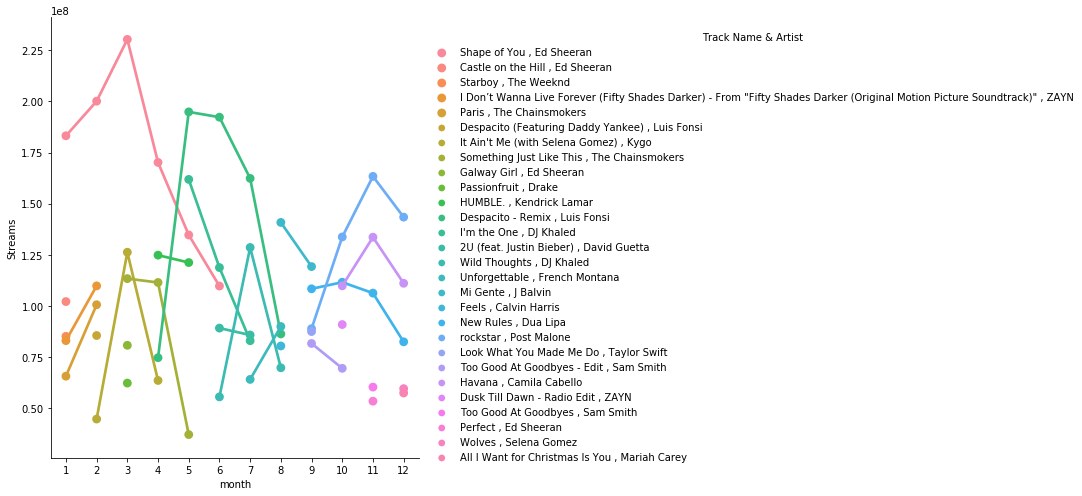

In [70]:
sns.catplot(data=df_top5_2017_groupbyMonth_global, hue="Track Name & Artist", x="month", y="Streams", 
            kind="point", height=7)

### Most streamed song of 2017- Shape Of You (Ed Sheeran)
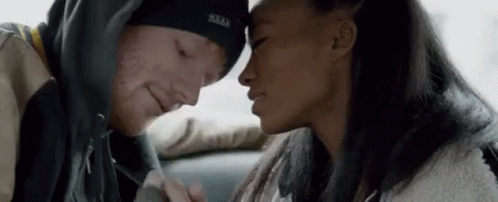

### Second most streamed song of 2017 -Despacito-Remix

In [20]:
df_top5_2017_groupbyMonth_global[df_top5_2017_groupbyMonth_global["month"]==5]

Id  month  \
3756  5CtI0qwDJkDQGwXD1H1cLb      5   
5355  72Q0FQQo32KJloivv5xge2      5   
6338  7qiZfU4dY1lWllzX7mPBI3      5   
5806  7KXjTSCq5nL1LoYtL7XAwS      5   
4902  6RUKPb4LETWmmr3iAEQktW      5   

                              Track Name & Artist  Region    Streams  
3756               Despacito - Remix , Luis Fonsi  Global  194869891  
5355                      I'm the One , DJ Khaled  Global  161861527  
6338                    Shape of You , Ed Sheeran  Global  134706207  
5806                     HUMBLE. , Kendrick Lamar  Global  121221098  
4902  Something Just Like This , The Chainsmokers  Global   37119838

In [24]:
despacito = df_top5_2017_groupbyMonth[df_top5_2017_groupbyMonth["Track Name & Artist"] == "Despacito - Remix , Luis Fonsi" ]

In [25]:
despacito

Id  month             Track Name & Artist  \
3689  5CtI0qwDJkDQGwXD1H1cLb      4  Despacito - Remix , Luis Fonsi   
3690  5CtI0qwDJkDQGwXD1H1cLb      4  Despacito - Remix , Luis Fonsi   
3692  5CtI0qwDJkDQGwXD1H1cLb      4  Despacito - Remix , Luis Fonsi   
3693  5CtI0qwDJkDQGwXD1H1cLb      4  Despacito - Remix , Luis Fonsi   
3695  5CtI0qwDJkDQGwXD1H1cLb      4  Despacito - Remix , Luis Fonsi   
...                      ...    ...                             ...   
3885  5CtI0qwDJkDQGwXD1H1cLb      8  Despacito - Remix , Luis Fonsi   
3886  5CtI0qwDJkDQGwXD1H1cLb      8  Despacito - Remix , Luis Fonsi   
3887  5CtI0qwDJkDQGwXD1H1cLb      8  Despacito - Remix , Luis Fonsi   
3888  5CtI0qwDJkDQGwXD1H1cLb      8  Despacito - Remix , Luis Fonsi   
3890  5CtI0qwDJkDQGwXD1H1cLb      9  Despacito - Remix , Luis Fonsi   

              Region   Streams  
3689       Argentina   4056391  
3690         Austria    218958  
3692         Bolivia    136135  
3693          Brazil   6160710  
3695           Chile   2129073  
...              ...       ...  
3885          Taiwan    741070  
3886          Turkey   1397281  
3887  United Kingdom   7536971  
3888   United States  16953360  
3890           Japan    169900  

[161 rows x 5 columns]

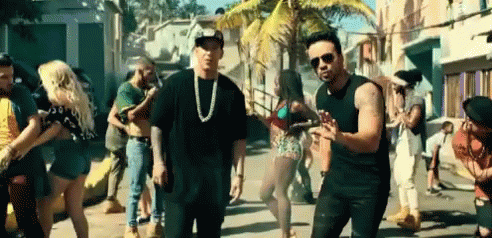

### Streaming with respect to Global

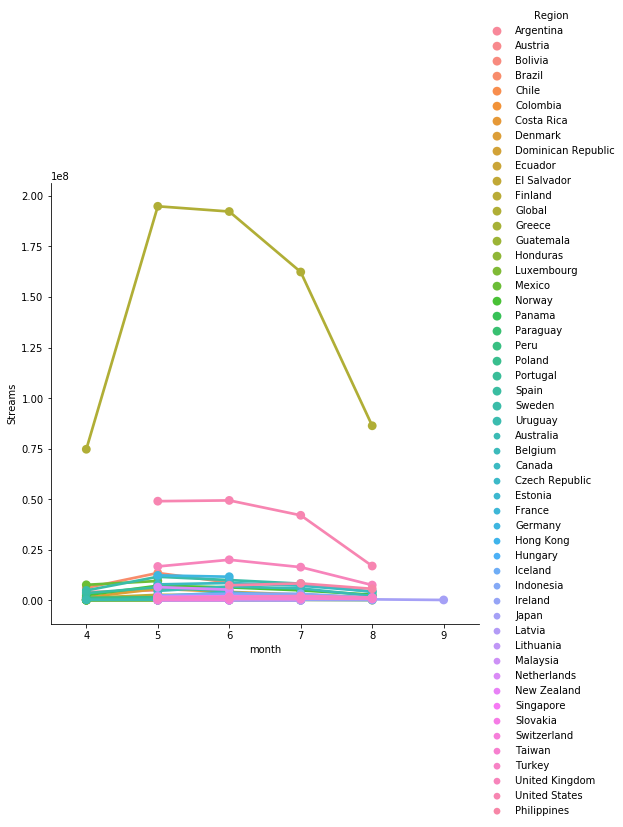

In [26]:
sns.catplot(data=despacito, hue="Region", x="month", y="Streams", kind="point", height=7)

### Countrywize streaming

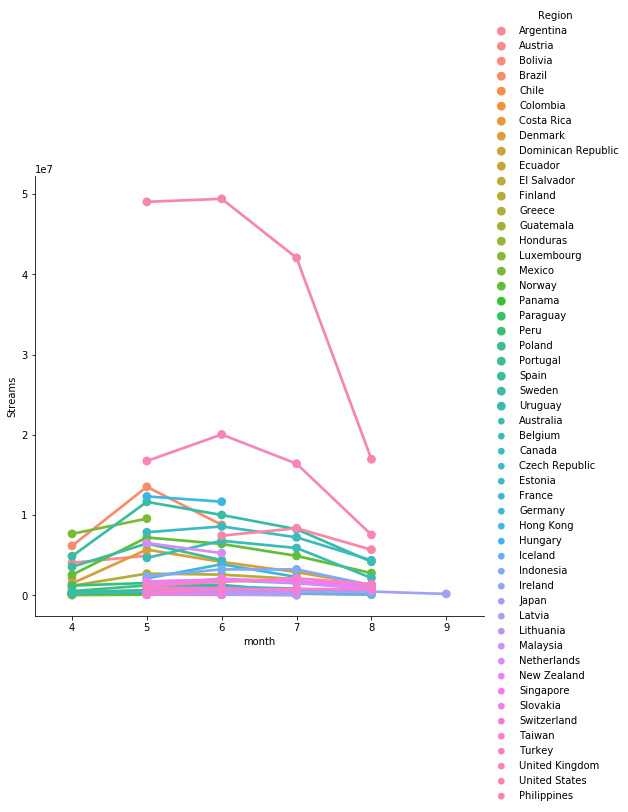

In [27]:
sns.catplot(data=despacito[despacito["Region"]!="Global"], hue="Region", x="month", y="Streams", kind="point", height=7)

### Second Data Source (To obtain Genre, Artist features and Track features)

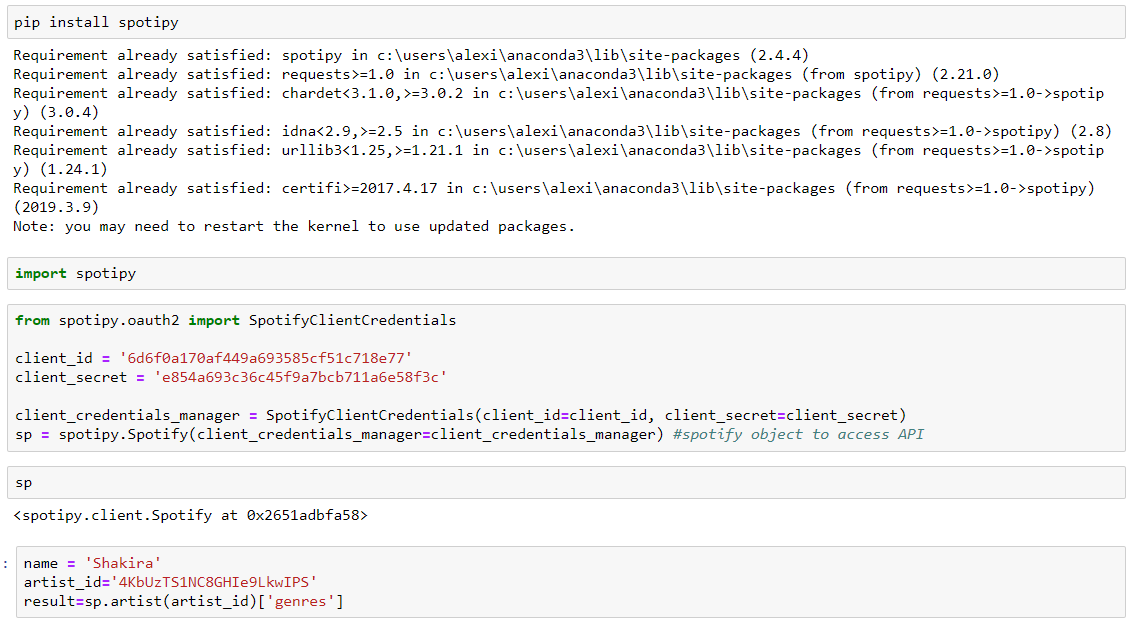

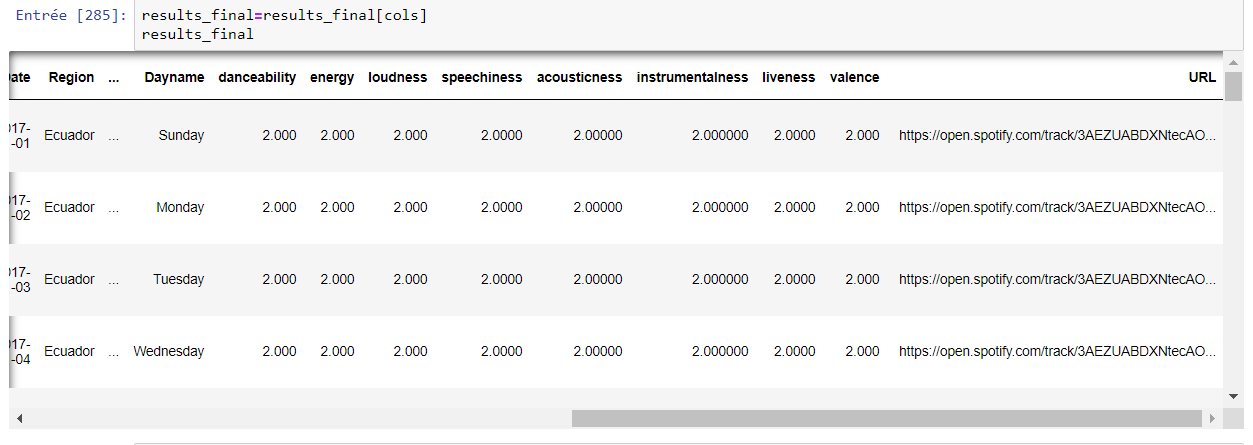

### Total number of Streams during each months for all the countries

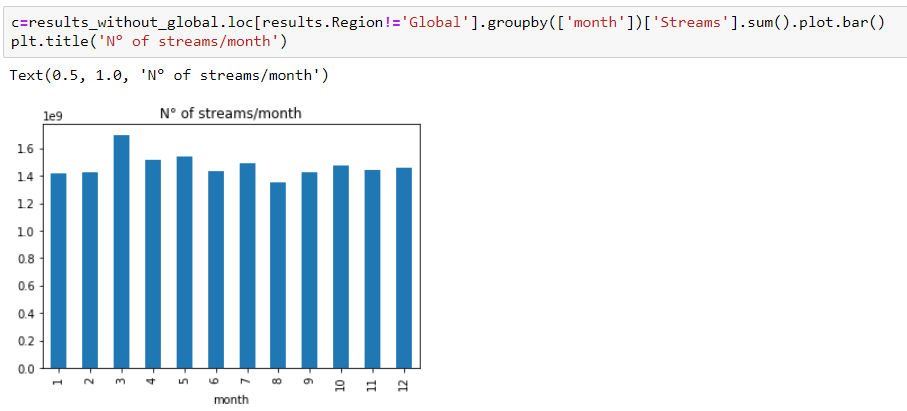

### Danceability and Energy for top 10 songs

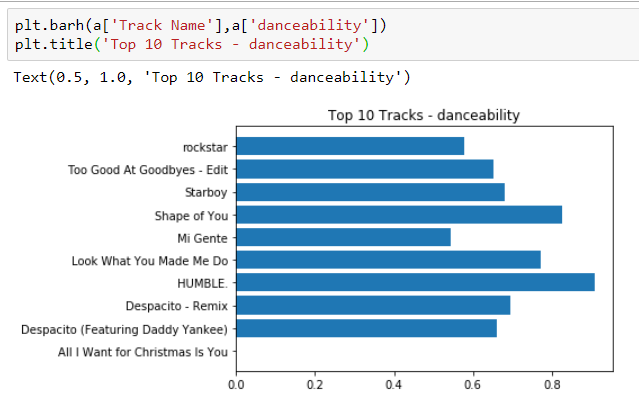
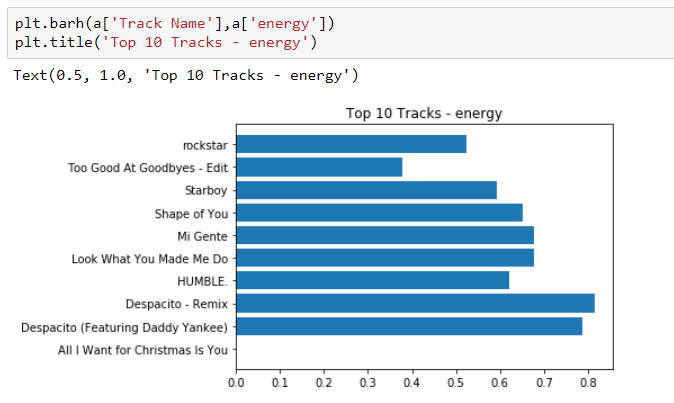

### Correlation Heat map

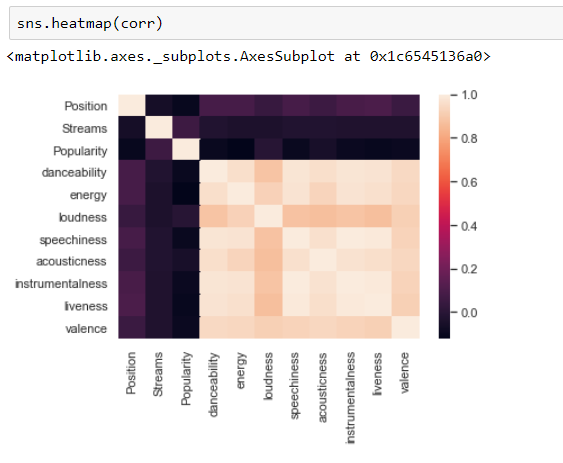

### Total Streams per country

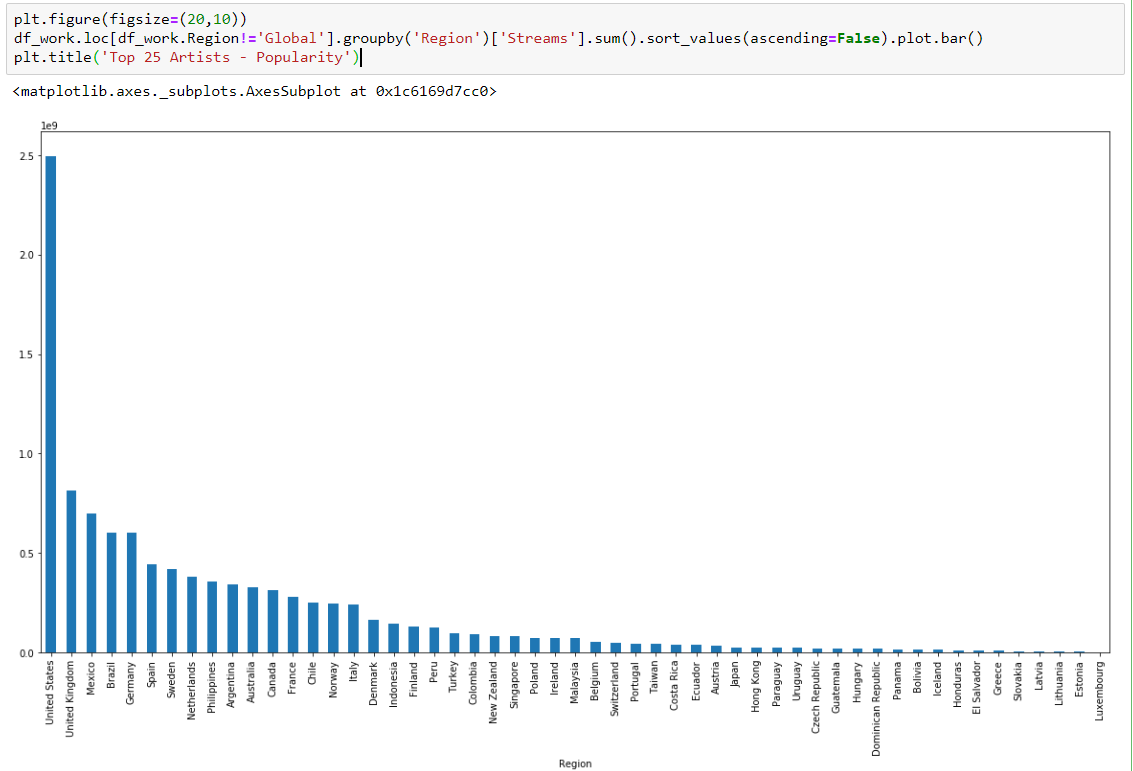

### Word Cloud

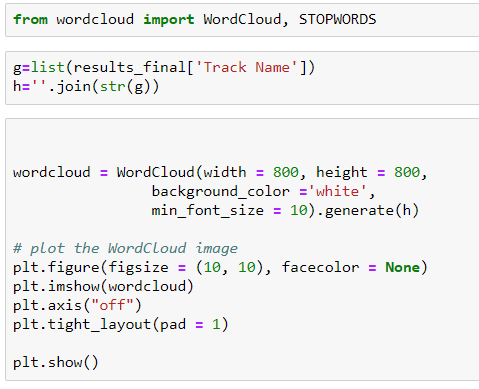

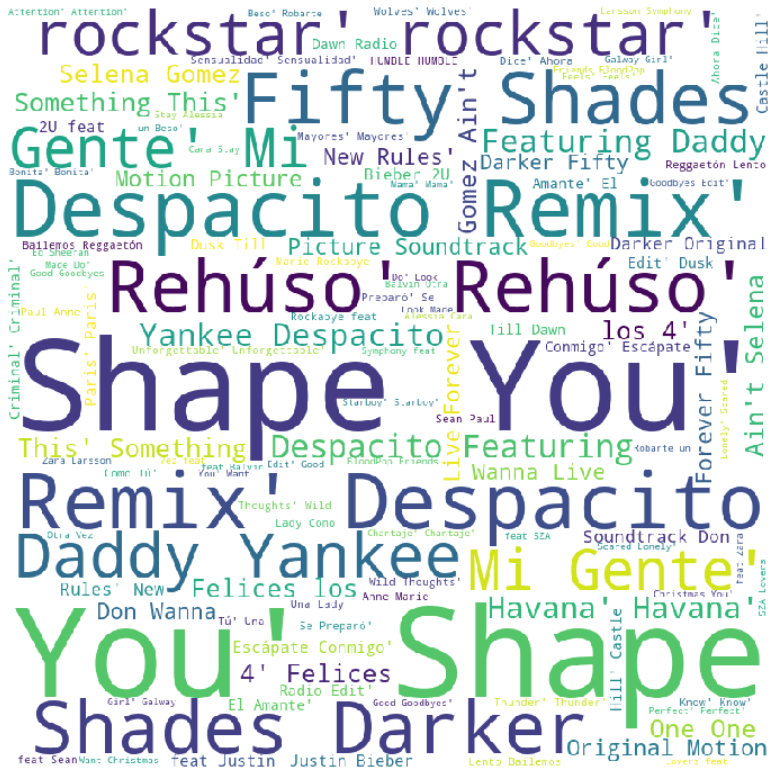

### Business Problem
#### Predicting popularity of songs in France based on data from neighbouring countries

### Selecting top 20 songs globally

In [30]:
df["month"] = df["Date"].apply( lambda x: int(x.split("-")[1]) )
global_top30ByMonth = df[(df["Region"]=="Global") & (df["Position"]<=21)].groupby(["month", "Region", "Track Name"])["Streams"].sum().reset_index().sort_values(["month", "Region", "Streams", "Track Name"], ascending=[True,True,False,True]).groupby(["month", "Region"]).head(20).reset_index()
global_top30ByMonth["Position"] = [i for i in range(1,21)]*12
print(global_top30ByMonth.shape)
global_top30ByMonth.head(50)

(240, 6)


index  month  Region                                         Track Name  \
0      49      1  Global                                       Shape of You   
1      52      1  Global                                            Starboy   
2       9      1  Global                                 Castle on the Hill   
3      28      1  Global  I Don’t Wanna Live Forever (Fifty Shades Darke...   
4      46      1  Global            Rockabye (feat. Sean Paul & Anne-Marie)   
5      11      1  Global                                             Closer   
6      47      1  Global                               Say You Won't Let Go   
7      18      1  Global                                   Don't Wanna Know   
8      30      1  Global                                   I Feel It Coming   
9      21      1  Global                                          Fake Love   
10     42      1  Global                                              Paris   
11     35      1  Global                                    Let Me Love You   
12      4      1  Global                Bad and Boujee (feat. Lil Uzi Vert)   
13      8      1  Global            Call On Me - Ryan Riback Extended Remix   
14      0      1  Global                                          24K Magic   
15     10      1  Global                                           Chantaje   
16     33      1  Global                                       Just Hold On   
17      3      1  Global                   Bad Things (with Camila Cabello)   
18      6      1  Global                                      Black Beatles   
19     41      1  Global                                          One Dance   
20     88      2  Global                                       Shape of You   
21     77      2  Global  I Don’t Wanna Live Forever (Fifty Shades Darke...   
22     83      2  Global                                              Paris   
23     72      2  Global                 Despacito (Featuring Daddy Yankee)   
24     67      2  Global                                 Castle on the Hill   
25     87      2  Global                                Scared to Be Lonely   
26     84      2  Global            Rockabye (feat. Sean Paul & Anne-Marie)   
27     91      2  Global                                            Starboy   
28     86      2  Global                               Say You Won't Let Go   
29     78      2  Global                                   I Feel It Coming   
30     70      2  Global                                             Closer   
31     66      2  Global            Call On Me - Ryan Riback Extended Remix   
32     63      2  Global                Bad and Boujee (feat. Lil Uzi Vert)   
33     68      2  Global                              Chained To The Rhythm   
34     79      2  Global                                             Issues   
35     69      2  Global                                           Chantaje   
36     80      2  Global                    It Ain't Me (with Selena Gomez)   
37     62      2  Global                   Bad Things (with Camila Cabello)   
38     81      2  Global                                       Just Hold On   
39     73      2  Global                                   Don't Wanna Know   
40    132      3  Global                                       Shape of You   
41    117      3  Global                    It Ain't Me (with Selena Gomez)   
42    134      3  Global                           Something Just Like This   
43    107      3  Global                                        Galway Girl   
44    103      3  Global                 Despacito (Featuring Daddy Yankee)   
45    114      3  Global  I Don’t Wanna Live Forever (Fifty Shades Darke...   
46    124      3  Global                                              Paris   
47    140      3  Global                                 That's What I Like   
48     99      3  Global                                 Castle on the Hill   
49    136      3  Global                           Sta

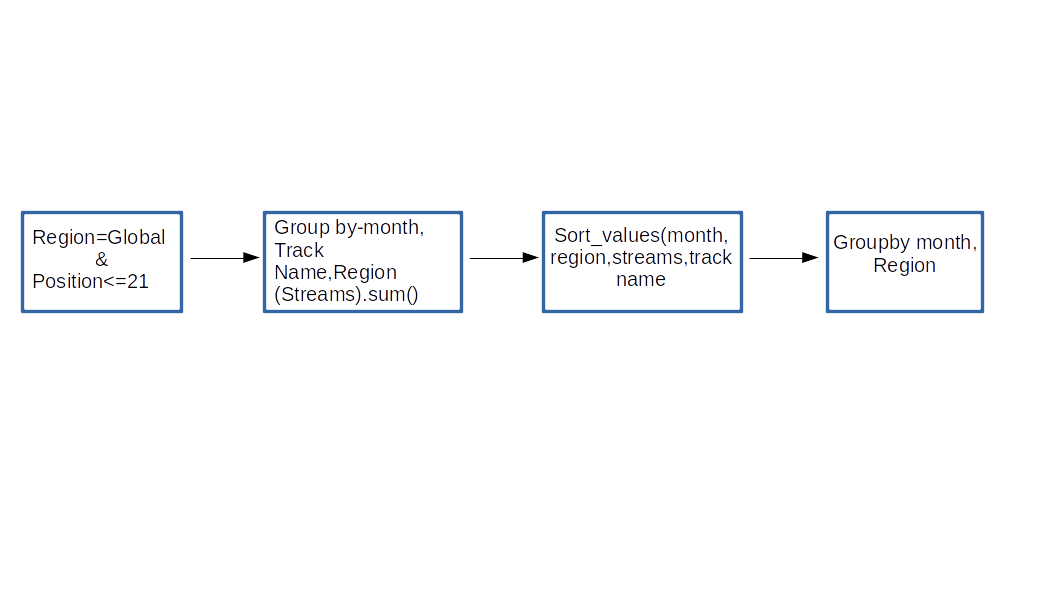

### Obtaining data for the top 20 global songs for France and neighbouring countries

In [31]:
def fill_na(init_df,global_df,name):
    lst = []
    count_df = init_df[init_df["Region"]==name]
    for m, t in zip(global_df["month"], global_df["Track Name"]):
        lst.append (count_df[(count_df["month"]==m) & (count_df["Track Name"]==t)  ]["Streams"].sum())
    global_df[name] = lst
    return global_df

list_countries = ['France', 'Switzerland', 'United Kingdom', 'Germany', 'Luxembourg', 'Netherlands' ,'Ireland', 'Portugal', 'Spain', 'Italy', 'Belgium', 'Iceland']
for c in list_countries:
    global_top30ByMonth = fill_na(df,global_top30ByMonth,c)

global_top30ByMonth.head(50)

index  month  Region                                         Track Name  \
0      49      1  Global                                       Shape of You   
1      52      1  Global                                            Starboy   
2       9      1  Global                                 Castle on the Hill   
3      28      1  Global  I Don’t Wanna Live Forever (Fifty Shades Darke...   
4      46      1  Global            Rockabye (feat. Sean Paul & Anne-Marie)   
5      11      1  Global                                             Closer   
6      47      1  Global                               Say You Won't Let Go   
7      18      1  Global                                   Don't Wanna Know   
8      30      1  Global                                   I Feel It Coming   
9      21      1  Global                                          Fake Love   
10     42      1  Global                                              Paris   
11     35      1  Global                                    Let Me Love You   
12      4      1  Global                Bad and Boujee (feat. Lil Uzi Vert)   
13      8      1  Global            Call On Me - Ryan Riback Extended Remix   
14      0      1  Global                                          24K Magic   
15     10      1  Global                                           Chantaje   
16     33      1  Global                                       Just Hold On   
17      3      1  Global                   Bad Things (with Camila Cabello)   
18      6      1  Global                                      Black Beatles   
19     41      1  Global                                          One Dance   
20     88      2  Global                                       Shape of You   
21     77      2  Global  I Don’t Wanna Live Forever (Fifty Shades Darke...   
22     83      2  Global                                              Paris   
23     72      2  Global                 Despacito (Featuring Daddy Yankee)   
24     67      2  Global                                 Castle on the Hill   
25     87      2  Global                                Scared to Be Lonely   
26     84      2  Global            Rockabye (feat. Sean Paul & Anne-Marie)   
27     91      2  Global                                            Starboy   
28     86      2  Global                               Say You Won't Let Go   
29     78      2  Global                                   I Feel It Coming   
30     70      2  Global                                             Closer   
31     66      2  Global            Call On Me - Ryan Riback Extended Remix   
32     63      2  Global                Bad and Boujee (feat. Lil Uzi Vert)   
33     68      2  Global                              Chained To The Rhythm   
34     79      2  Global                                             Issues   
35     69      2  Global                                           Chantaje   
36     80      2  Global                    It Ain't Me (with Selena Gomez)   
37     62      2  Global                   Bad Things (with Camila Cabello)   
38     81      2  Global                                       Just Hold On   
39     73      2  Global                                   Don't Wanna Know   
40    132      3  Global                                       Shape of You   
41    117      3  Global                    It Ain't Me (with Selena Gomez)   
42    134      3  Global                           Something Just Like This   
43    107      3  Global                                        Galway Girl   
44    103      3  Global                 Despacito (Featuring Daddy Yankee)   
45    114      3  Global  I Don’t Wanna Live Forever (Fifty Shades Darke...   
46    124      3  Global                                              Paris   
47    140      3  Global                                 That's What I Like   
48     99      3  Global                                 Castle on the Hill   
49    136      3  Global                           Sta

In [32]:
Streams_data=global_top30ByMonth[list_countries]
Streams_data.shape

(240, 12)

In [33]:
y=Streams_data.France
X=Streams_data.drop('France',axis=1)
X=(X-X.mean())/X.std()
X

Switzerland  United Kingdom   Germany  Luxembourg  Netherlands   Ireland  \
0       3.979586        5.110579  3.319376    2.743134     3.912308  5.000416   
1       0.156230       -0.000008  0.050480    0.779235    -0.000545 -0.028933   
2       0.398876        3.341549  0.652502    0.803763     0.585907  3.550877   
3       0.250915       -0.093100  0.750457    0.744667     0.189952  0.177940   
4       0.786316        0.712447  0.833379    0.852246     1.535798  0.645195   
..           ...             ...       ...         ...          ...       ...   
235     0.246423       -0.699800  0.010558   -0.900546    -0.462489 -0.568623   
236    -0.012336       -0.954407  0.367837   -0.840085    -1.005583 -0.655463   
237    -1.520725       -0.387221 -1.346759   -0.900546    -1.572623 -0.241060   
238    -0.007839        1.143479  0.773903   -0.653154     0.379655  0.622405   
239    -1.181217       -1.075556 -1.163583   -0.900546    -0.861239 -0.439161   

     Portugal     Spain     Italy   Belgium   Iceland  
0    3.649057  1.906607  2.816956  3.605663  2.173955  
1    1.457287  0.300447 -0.177199  0.215629  0.527219  
2   -0.055096  0.292151  0.441989  0.604353  0.139873  
3    0.594042 -0.116360 -0.127267  0.346917  0.537759  
4    0.499095  1.384131  1.866255  0.744360  0.314631  
..        ...       ...       ...       ...       ...  
235  0.004154 -0.012805  0.583833 -0.214242 -0.843208  
236 -0.412593 -0.912355 -1.143872 -0.604355 -1.089646  
237 -0.598427 -1.080093 -1.620069 -1.168416 -0.564302  
238 -1.712593 -0.714742  0.009793 -0.014102  0.790463  
239 -0.876245 -0.897212 -0.811229 -0.824181 -1.522065  

[240 rows x 11 columns]

##### France Streams to predict

In [54]:
print(y.tolist()[0:50])

[5006034, 2448545, 1826724, 1640845, 2837262, 1320062, 1919891, 1981039, 2322902, 878128, 1056940, 1923640, 780891, 1857732, 1593545, 1873314, 882876, 516309, 1615924, 1957904, 6010078, 3020302, 2068540, 830513, 1982255, 1997035, 2828285, 1661949, 1999545, 2192475, 829784, 2433718, 940407, 1304876, 339688, 2222733, 1106192, 566237, 1212552, 1701160, 7009842, 3359941, 2175819, 2159386, 1762023, 2936001, 1929792, 1375151, 2067105, 1588355]


In [34]:
from statsmodels.tools.tools import add_constant
X=add_constant(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=11)
y_train.shape
X_train.shape

(192, 12)

In [35]:
model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 France   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     62.79
Date:                Sun, 15 Sep 2019   Prob (F-statistic):           1.09e-62
Time:                        20:53:38   Log-Likelihood:                -3490.8
No. Observations:                 240   AIC:                             7006.
Df Residuals:                     228   BIC:                             7047.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.999e+06   3.32e+04     60.145      0.000    1.93e+06    2.06e+06
Switzerland     5.109e+05   1.18e+05      4.337      0.000    2.79e+05    7.43e+05
United Kingdom   1.04e+05   1.24e+05      0.839      0.402    -1.4e+05    3.48e+05
Germany        -5.004e+04   9.28e+04     -0.539      0.590   -2.33e+05    1.33e+05
Luxembourg     -2.946e+04   4.57e+04     -0.645      0.520    -1.2e+05    6.06e+04
Netherlands    -7.768e+04   9.62e+04     -0.808      0.420   -2.67e+05    1.12e+05
Ireland        -2.371e+05   1.24e+05     -1.918      0.056   -4.81e+05    6421.241
Portugal        8.261e+04   6.53e+04      1.264      0.207   -4.61e+04    2.11e+05
Spain          -8.017e+04   5.83e+04     -1.375      0.170   -1.95e+05    3.47e+04
Italy           1.541e+05      7e+04      2.203      0.029    1.63e+04    2.92e+05
Belgium           3.4e+05   1.05e+05      3.234      0.001    1.33e+05    5.47e+05
Iceland         1.964e+05   4.96e+04      3.956      0.000    9.86e+04    2.94e+05
==============================================================================
Omnibus:                        1.460   Durbin-Watson:                   1.741
Prob(Omnibus):                  0.482   Jarque-Bera (JB):                1.169
Skew:                           0.152   Prob(JB):                        0.557
Kurtosis:                       3.155   Cond. No.                         14.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Scatter plot of the predicted labels (Streams)

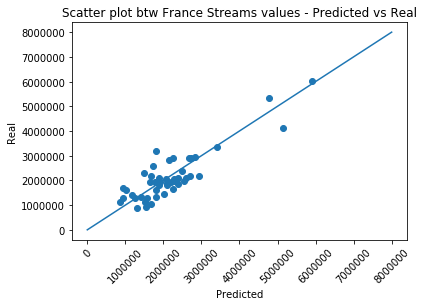

In [75]:
plt.scatter(model.predict(X_test), y_test)
plt.xticks(rotation=45)
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Scatter plot btw France Streams values - Predicted vs Real')
plt.plot( [0,8000000],[0,8000000] )

### Pearson values for the predicted model

In [77]:
from scipy.stats.stats import pearsonr
c = pearsonr(model.predict(X_test), y_test)
print('Pearson Correlation between our real labels and predicted labels is :')
print('\t{} \t(with a p-value of {})'.format( round(c[0], 5), c[1]))

Pearson Correlation between our real labels and predicted labels is :
	0.87704 	(with a p-value of 2.999616011158762e-16)


# Conclusion
### The Peason's correlation proves the model of high performance
### The model can be deployed for future forcasting.

# Other models
### predicting the position of top songs in France
### recommendation system